In [104]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [105]:
part_d = pd.read_csv("provider_data/partd/Part-D.csv",encoding='ISO-8859-1',low_memory=False)
leie_ex = pd.read_csv("provider_data/LEIE_Exclusion.csv",encoding='ISO-8859-1',low_memory=False)

In [106]:
part_d

,PRSCRBR_NPI,Prscrbr_Last_Org_Name,Prscrbr_First_Name,Prscrbr_MI,Prscrbr_Crdntls,Prscrbr_Gndr,Prscrbr_Ent_Cd,Prscrbr_St1,Prscrbr_St2,Prscrbr_City,...,Bene_Male_Cnt,Bene_Race_Wht_Cnt,Bene_Race_Black_Cnt,Bene_Race_Api_Cnt,Bene_Race_Hspnc_Cnt,Bene_Race_Natind_Cnt,Bene_Race_Othr_Cnt,Bene_Dual_Cnt,Bene_Ndual_Cnt,Bene_Avg_Risk_Scre
0,1003000126,Enkeshafi,Ardalan,NaN,M.D.,M,I,6410 Rockledge Dr Ste 304,NaN,Bethesda,...,49.0,67.0,27.0,NaN,NaN,0.0,NaN,28.0,78.0,2.245800
1,1003000142,Khalil,Rashid,NaN,M.D.,M,I,4126 N Holland Sylvania Rd,Suite 220,Toledo,...,82.0,130.0,81.0,NaN,12.0,0.0,NaN,125.0,103.0,1.695165
2,1003000167,Escobar,Julio,E,DDS,M,I,5 Pine Cone Rd,NaN,Dayton,...,23.0,41.0,0.0,0.0,NaN,0.0,NaN,0.0,43.0,1.006070
3,1003000175,Reyes-Vasquez,Belinda,NaN,D.D.S.,F,I,322 N Azusa Ave Ste 202,NaN,La Puente,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.251869
4,1003000282,Blakemore,Rosie,K,FNP,F,I,Tennessee Prison For Women,3881 Stewarts Lane,Nashville,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.919074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255170,1992999569,Yuen,Jenny,F,"O.D., F.A.A.O",F,I,515 Gough St,NaN,San Francisco,...,NaN,NaN,0.0,16.0,0.0,0.0,NaN,NaN,NaN,1.451353
1255171,1992999650,Yong,Wayne,B,DMD,M,I,28 Atlantic Avenue,121,Boston,...,13.0,NaN,NaN,18.0,0.0,0.0,NaN,NaN,NaN,1.344691
1255172,1992999759,Soriano,Dino,V,RN MSN HSA FNP-C,M,I,171 Clover Point Cir,NaN,Guyton,...,NaN,16.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,1.545349
1255173,1992999825,Deschenes,Geoffrey,R,M.D.,M,I,1100 9th Ave,Ms:m4-Pfs,Seattle,...,62.0,100.0,NaN,16.0,NaN,0.0,NaN,18.0,108.0,1.109445


In [107]:
part_d.columns

Index(['PRSCRBR_NPI', 'Prscrbr_Last_Org_Name', 'Prscrbr_First_Name',
       'Prscrbr_MI', 'Prscrbr_Crdntls', 'Prscrbr_Gndr', 'Prscrbr_Ent_Cd',
       'Prscrbr_St1', 'Prscrbr_St2', 'Prscrbr_City', 'Prscrbr_State_Abrvtn',
       'Prscrbr_State_FIPS', 'Prscrbr_zip5', 'Prscrbr_RUCA',
       'Prscrbr_RUCA_Desc', 'Prscrbr_Cntry', 'Prscrbr_Type',
       'Prscrbr_Type_src', 'Tot_Clms', 'Tot_30day_Fills', 'Tot_Drug_Cst',
       'Tot_Day_Suply', 'Tot_Benes', 'GE65_Sprsn_Flag', 'GE65_Tot_Clms',
       'GE65_Tot_30day_Fills', 'GE65_Tot_Drug_Cst', 'GE65_Tot_Day_Suply',
       'GE65_Bene_Sprsn_Flag', 'GE65_Tot_Benes', 'Brnd_Sprsn_Flag',
       'Brnd_Tot_Clms', 'Brnd_Tot_Drug_Cst', 'Gnrc_Sprsn_Flag',
       'Gnrc_Tot_Clms', 'Gnrc_Tot_Drug_Cst', 'Othr_Sprsn_Flag',
       'Othr_Tot_Clms', 'Othr_Tot_Drug_Cst', 'MAPD_Sprsn_Flag',
       'MAPD_Tot_Clms', 'MAPD_Tot_Drug_Cst', 'PDP_Sprsn_Flag', 'PDP_Tot_Clms',
       'PDP_Tot_Drug_Cst', 'LIS_Sprsn_Flag', 'LIS_Tot_Clms', 'LIS_Drug_Cst',
       'NonLIS_Sprsn_

In [108]:
part_d = part_d.dropna(subset=["PRSCRBR_NPI"],axis=0)
part_d = part_d.dropna(subset=["Prscrbr_Last_Org_Name"],axis=0)
part_d = part_d.dropna(subset=["Prscrbr_First_Name"],axis=0)

In [109]:
leie_ex = leie_ex.dropna(subset=["NPI"],axis=0)
ex_npi = leie_ex[leie_ex["NPI"]!=0]["NPI"]
ex_lnames = leie_ex.dropna(subset=["LASTNAME"],axis=0)["LASTNAME"]
ex_fnames = leie_ex.dropna(subset=["FIRSTNAME"],axis=0)["FIRSTNAME"]
leie_ex["MIDNAME"] = leie_ex["MIDNAME"].apply(lambda row : row if row!= " " else 0)
ex_mi = leie_ex[leie_ex["MIDNAME"]!=0]["MIDNAME"]

In [110]:
print(leie_ex.shape)
print(part_d.shape)

(76546, 18)
(1255124, 85)


In [111]:
part_d["PRSCRBR_NPI"].value_counts()

1003000126    1
1669665345    1
1669665964    1
1669665956    1
1669665824    1
             ..
1336200385    1
1336200351    1
1336200328    1
1336200310    1
1992999874    1
Name: PRSCRBR_NPI, Length: 1255124, dtype: int64

In [112]:
ex_npi_unique = leie_ex.drop_duplicates("NPI")  # Remove duplicate NPI values
ex_npi_dict = dict(zip(ex_npi_unique['NPI'], ex_npi_unique['EXCLTYPE']))

part_d['Fraud'] = np.where(part_d['PRSCRBR_NPI'].isin(ex_npi_dict), 1, 0)
part_d['FraudType'] = np.where(part_d['Fraud'] == 1,part_d['PRSCRBR_NPI'].map(ex_npi_dict),0)

In [113]:
part_d["Fraud"].value_counts()

0    1254832
1        292
Name: Fraud, dtype: int64

In [114]:
part_d

,PRSCRBR_NPI,Prscrbr_Last_Org_Name,Prscrbr_First_Name,Prscrbr_MI,Prscrbr_Crdntls,Prscrbr_Gndr,Prscrbr_Ent_Cd,Prscrbr_St1,Prscrbr_St2,Prscrbr_City,...,Bene_Race_Black_Cnt,Bene_Race_Api_Cnt,Bene_Race_Hspnc_Cnt,Bene_Race_Natind_Cnt,Bene_Race_Othr_Cnt,Bene_Dual_Cnt,Bene_Ndual_Cnt,Bene_Avg_Risk_Scre,Fraud,FraudType
0,1003000126,Enkeshafi,Ardalan,NaN,M.D.,M,I,6410 Rockledge Dr Ste 304,NaN,Bethesda,...,27.0,NaN,NaN,0.0,NaN,28.0,78.0,2.245800,0,0
1,1003000142,Khalil,Rashid,NaN,M.D.,M,I,4126 N Holland Sylvania Rd,Suite 220,Toledo,...,81.0,NaN,12.0,0.0,NaN,125.0,103.0,1.695165,0,0
2,1003000167,Escobar,Julio,E,DDS,M,I,5 Pine Cone Rd,NaN,Dayton,...,0.0,0.0,NaN,0.0,NaN,0.0,43.0,1.006070,0,0
3,1003000175,Reyes-Vasquez,Belinda,NaN,D.D.S.,F,I,322 N Azusa Ave Ste 202,NaN,La Puente,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.251869,0,0
4,1003000282,Blakemore,Rosie,K,FNP,F,I,Tennessee Prison For Women,3881 Stewarts Lane,Nashville,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.919074,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255170,1992999569,Yuen,Jenny,F,"O.D., F.A.A.O",F,I,515 Gough St,NaN,San Francisco,...,0.0,16.0,0.0,0.0,NaN,NaN,NaN,1.451353,0,0
1255171,1992999650,Yong,Wayne,B,DMD,M,I,28 Atlantic Avenue,121,Boston,...,NaN,18.0,0.0,0.0,NaN,NaN,NaN,1.344691,0,0
1255172,1992999759,Soriano,Dino,V,RN MSN HSA FNP-C,M,I,171 Clover Point Cir,NaN,Guyton,...,NaN,0.0,0.0,0.0,NaN,NaN,NaN,1.545349,1,1128a1
1255173,1992999825,Deschenes,Geoffrey,R,M.D.,M,I,1100 9th Ave,Ms:m4-Pfs,Seattle,...,NaN,16.0,NaN,0.0,NaN,18.0,108.0,1.109445,0,0


In [115]:
part_d.columns

Index(['PRSCRBR_NPI', 'Prscrbr_Last_Org_Name', 'Prscrbr_First_Name',
       'Prscrbr_MI', 'Prscrbr_Crdntls', 'Prscrbr_Gndr', 'Prscrbr_Ent_Cd',
       'Prscrbr_St1', 'Prscrbr_St2', 'Prscrbr_City', 'Prscrbr_State_Abrvtn',
       'Prscrbr_State_FIPS', 'Prscrbr_zip5', 'Prscrbr_RUCA',
       'Prscrbr_RUCA_Desc', 'Prscrbr_Cntry', 'Prscrbr_Type',
       'Prscrbr_Type_src', 'Tot_Clms', 'Tot_30day_Fills', 'Tot_Drug_Cst',
       'Tot_Day_Suply', 'Tot_Benes', 'GE65_Sprsn_Flag', 'GE65_Tot_Clms',
       'GE65_Tot_30day_Fills', 'GE65_Tot_Drug_Cst', 'GE65_Tot_Day_Suply',
       'GE65_Bene_Sprsn_Flag', 'GE65_Tot_Benes', 'Brnd_Sprsn_Flag',
       'Brnd_Tot_Clms', 'Brnd_Tot_Drug_Cst', 'Gnrc_Sprsn_Flag',
       'Gnrc_Tot_Clms', 'Gnrc_Tot_Drug_Cst', 'Othr_Sprsn_Flag',
       'Othr_Tot_Clms', 'Othr_Tot_Drug_Cst', 'MAPD_Sprsn_Flag',
       'MAPD_Tot_Clms', 'MAPD_Tot_Drug_Cst', 'PDP_Sprsn_Flag', 'PDP_Tot_Clms',
       'PDP_Tot_Drug_Cst', 'LIS_Sprsn_Flag', 'LIS_Tot_Clms', 'LIS_Drug_Cst',
       'NonLIS_Sprsn_

In [116]:
part_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1255124 entries, 0 to 1255174
Data columns (total 87 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   PRSCRBR_NPI                     1255124 non-null  int64  
 1   Prscrbr_Last_Org_Name           1255124 non-null  object 
 2   Prscrbr_First_Name              1255124 non-null  object 
 3   Prscrbr_MI                      839049 non-null   object 
 4   Prscrbr_Crdntls                 1155833 non-null  object 
 5   Prscrbr_Gndr                    1255124 non-null  object 
 6   Prscrbr_Ent_Cd                  1255124 non-null  object 
 7   Prscrbr_St1                     1255123 non-null  object 
 8   Prscrbr_St2                     341847 non-null   object 
 9   Prscrbr_City                    1255123 non-null  object 
 10  Prscrbr_State_Abrvtn            1255124 non-null  object 
 11  Prscrbr_State_FIPS              1253994 non-null  float64
 12  

In [117]:
part_d[part_d['Prscrbr_Type_src'].isnull()]["Fraud"].value_counts()

Series([], Name: Fraud, dtype: int64)

In [118]:
# Only US Frauds
part_d = part_d[part_d["Prscrbr_Cntry"] == 'US']

### Prscrbr_Type_src

In [119]:
part_d["Prscrbr_Type_src"]

0          S
1          S
2          S
3          S
4          S
          ..
1255170    S
1255171    S
1255172    S
1255173    S
1255174    S
Name: Prscrbr_Type_src, Length: 1254987, dtype: object

In [120]:
# Binary Encoding
part_d["Prscrbr_Type_src"] = part_d["Prscrbr_Type_src"].apply(lambda row : 1 if row == "S" else 0).astype(float)

In [121]:
part_d["Prscrbr_Type_src"].value_counts()

1.0    1115928
0.0     139059
Name: Prscrbr_Type_src, dtype: int64

### Prscrbr_Gndr

In [122]:
part_d["Prscrbr_Gndr"]

0          M
1          M
2          M
3          F
4          F
          ..
1255170    F
1255171    M
1255172    M
1255173    M
1255174    F
Name: Prscrbr_Gndr, Length: 1254987, dtype: object

In [123]:
# Binary Encoding
part_d["Prscrbr_Gndr"] = part_d["Prscrbr_Gndr"].apply(lambda row : 1 if row == "F" else 0).astype(float)

In [124]:
part_d["Prscrbr_Gndr"]

0          0.0
1          0.0
2          0.0
3          1.0
4          1.0
          ... 
1255170    1.0
1255171    0.0
1255172    0.0
1255173    0.0
1255174    1.0
Name: Prscrbr_Gndr, Length: 1254987, dtype: float64

### Tot_Clms

In [125]:
part_d["Tot_Clms"]

0           324
1          1992
2            57
3            18
4            37
           ... 
1255170      40
1255171      72
1255172      47
1255173     249
1255174     274
Name: Tot_Clms, Length: 1254987, dtype: int64

In [126]:
part_d["Tot_Clms"] = part_d["Tot_Clms"].astype(float)

In [127]:
part_d["Tot_Clms"]

0           324.0
1          1992.0
2            57.0
3            18.0
4            37.0
            ...  
1255170      40.0
1255171      72.0
1255172      47.0
1255173     249.0
1255174     274.0
Name: Tot_Clms, Length: 1254987, dtype: float64

### Tot_Day_Suply

In [128]:
part_d["Tot_Day_Suply"]

0           8621
1          60953
2            554
3            181
4           1366
           ...  
1255170     2357
1255171     1092
1255172     2704
1255173     5801
1255174     6436
Name: Tot_Day_Suply, Length: 1254987, dtype: int64

In [129]:
part_d["Tot_Day_Suply"] = part_d["Tot_Day_Suply"].astype(float)

In [130]:
part_d["Tot_Day_Suply"]

0           8621.0
1          60953.0
2            554.0
3            181.0
4           1366.0
            ...   
1255170     2357.0
1255171     1092.0
1255172     2704.0
1255173     5801.0
1255174     6436.0
Name: Tot_Day_Suply, Length: 1254987, dtype: float64

### GE65_Sprsn_Flag

In [131]:
part_d[part_d["GE65_Sprsn_Flag"].isnull()]["Fraud"].value_counts()

0    960580
1       224
Name: Fraud, dtype: int64

In [132]:
part_d["GE65_Sprsn_Flag"].value_counts()

#    247982
*     46201
Name: GE65_Sprsn_Flag, dtype: int64

In [133]:
replace_dict = {'#': 1, '*': 0, 'NA': pd.NA}
part_d['GE65_Sprsn_Flag'] = part_d['GE65_Sprsn_Flag'].replace(replace_dict)

In [134]:
part_d["GE65_Sprsn_Flag"].value_counts()

1.0    247982
0.0     46201
Name: GE65_Sprsn_Flag, dtype: int64

### GE65_Bene_Sprsn_Flag

In [60]:
part_d["GE65_Bene_Sprsn_Flag"].value_counts()

#    384665
*    207254
Name: GE65_Bene_Sprsn_Flag, dtype: int64

In [61]:
replace_dict = {'#': 1, '*': 0, 'NA': pd.NA}
part_d['GE65_Bene_Sprsn_Flag'] = part_d['GE65_Bene_Sprsn_Flag'].replace(replace_dict)

In [62]:
part_d["GE65_Bene_Sprsn_Flag"].value_counts()

1.0    384665
0.0    207254
Name: GE65_Bene_Sprsn_Flag, dtype: int64

### Brnd_Sprsn_Flag

In [63]:
part_d["Brnd_Sprsn_Flag"].value_counts()

*    342262
#    201152
Name: Brnd_Sprsn_Flag, dtype: int64

In [64]:
replace_dict = {'#': 1, '*': 0, 'NA': pd.NA}
part_d['Brnd_Sprsn_Flag'] = part_d['Brnd_Sprsn_Flag'].replace(replace_dict)

In [65]:
part_d["Brnd_Sprsn_Flag"].value_counts()

0.0    342262
1.0    201152
Name: Brnd_Sprsn_Flag, dtype: int64

### Gnrc_Sprsn_Flag

In [68]:
part_d["Gnrc_Sprsn_Flag"].value_counts()

*    27417
#     2749
Name: Gnrc_Sprsn_Flag, dtype: int64

In [69]:
replace_dict = {'#': 1, '*': 0, 'NA': pd.NA}
part_d['Gnrc_Sprsn_Flag'] = part_d['Gnrc_Sprsn_Flag'].replace(replace_dict)

In [70]:
part_d["Gnrc_Sprsn_Flag"].value_counts()

0.0    27417
1.0     2749
Name: Gnrc_Sprsn_Flag, dtype: int64

### Othr_Sprsn_Flag

In [71]:
part_d["Othr_Sprsn_Flag"].value_counts()

#    292070
*    246111
Name: Othr_Sprsn_Flag, dtype: int64

In [72]:
replace_dict = {'#': 1, '*': 0, 'NA': pd.NA}
part_d['Othr_Sprsn_Flag'] = part_d['Othr_Sprsn_Flag'].replace(replace_dict)

In [73]:
part_d["Othr_Sprsn_Flag"].value_counts()

1.0    292070
0.0    246111
Name: Othr_Sprsn_Flag, dtype: int64

### MAPD_Sprsn_Flag 

In [75]:
part_d["MAPD_Sprsn_Flag"].value_counts()

*    161977
#     69281
Name: MAPD_Sprsn_Flag, dtype: int64

In [76]:
replace_dict = {'#': 1, '*': 0, 'NA': pd.NA}
part_d['MAPD_Sprsn_Flag'] = part_d['MAPD_Sprsn_Flag'].replace(replace_dict)

In [77]:
part_d["MAPD_Sprsn_Flag"].value_counts()

0.0    161977
1.0     69281
Name: MAPD_Sprsn_Flag, dtype: int64

### PDP_Sprsn_Flag

In [78]:
part_d["PDP_Sprsn_Flag"].value_counts()

#    120161
*    111097
Name: PDP_Sprsn_Flag, dtype: int64

In [79]:
replace_dict = {'#': 1, '*': 0, 'NA': pd.NA}
part_d['PDP_Sprsn_Flag'] = part_d['PDP_Sprsn_Flag'].replace(replace_dict)

In [80]:
part_d["PDP_Sprsn_Flag"].value_counts()

1.0    120161
0.0    111097
Name: PDP_Sprsn_Flag, dtype: int64

### LIS_Sprsn_Flag

In [81]:
part_d["LIS_Sprsn_Flag"].value_counts()

*    203098
#     63592
Name: LIS_Sprsn_Flag, dtype: int64

In [82]:
replace_dict = {'#': 1, '*': 0, 'NA': pd.NA}
part_d['LIS_Sprsn_Flag'] = part_d['LIS_Sprsn_Flag'].replace(replace_dict)

In [83]:
part_d["LIS_Sprsn_Flag"].value_counts()

0.0    203098
1.0     63592
Name: LIS_Sprsn_Flag, dtype: int64

### NonLIS_Sprsn_Flag

In [84]:
part_d["NonLIS_Sprsn_Flag"].value_counts()

#    171519
*     95171
Name: NonLIS_Sprsn_Flag, dtype: int64

In [85]:
replace_dict = {'#': 1, '*': 0, 'NA': pd.NA}
part_d['NonLIS_Sprsn_Flag'] = part_d['NonLIS_Sprsn_Flag'].replace(replace_dict)

In [86]:
part_d["NonLIS_Sprsn_Flag"].value_counts()

1.0    171519
0.0     95171
Name: NonLIS_Sprsn_Flag, dtype: int64

### Antpsyct_GE65_Sprsn_Flag

In [135]:
part_d["Antpsyct_GE65_Sprsn_Flag"].value_counts()

*    459921
Name: Antpsyct_GE65_Sprsn_Flag, dtype: int64

In [88]:
replace_dict = {'#': 1, '*': 0, 'NA': pd.NA}
part_d['Antpsyct_GE65_Sprsn_Flag'] = part_d['Antpsyct_GE65_Sprsn_Flag'].replace(replace_dict)

In [89]:
part_d["Antpsyct_GE65_Sprsn_Flag"].value_counts()

0.0    459921
Name: Antpsyct_GE65_Sprsn_Flag, dtype: int64

### Label Encoding

In [90]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
part_d['Prscrbr_Crdntls'] = label_encoder.fit_transform(part_d['Prscrbr_Crdntls'])

In [91]:
part_d["Prscrbr_Crdntls"].value_counts()

9176     297695
7632     269106
16837     99276
13493     55200
4394      49226
          ...  
12433         1
13838         1
16337         1
15991         1
15356         1
Name: Prscrbr_Crdntls, Length: 16838, dtype: int64

In [92]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
part_d['Prscrbr_Type'] = label_encoder.fit_transform(part_d['Prscrbr_Type'])

In [93]:
part_d["Prscrbr_Type"].value_counts()

120    200391
42     127259
86     124838
60     112858
155    107367
        ...  
182         1
90          1
134         1
166         1
58          1
Name: Prscrbr_Type, Length: 216, dtype: int64

In [94]:
part_d.columns

Index(['PRSCRBR_NPI', 'Prscrbr_Last_Org_Name', 'Prscrbr_First_Name',
       'Prscrbr_MI', 'Prscrbr_Crdntls', 'Prscrbr_Gndr', 'Prscrbr_Ent_Cd',
       'Prscrbr_St1', 'Prscrbr_St2', 'Prscrbr_City', 'Prscrbr_State_Abrvtn',
       'Prscrbr_State_FIPS', 'Prscrbr_zip5', 'Prscrbr_RUCA',
       'Prscrbr_RUCA_Desc', 'Prscrbr_Cntry', 'Prscrbr_Type',
       'Prscrbr_Type_src', 'Tot_Clms', 'Tot_30day_Fills', 'Tot_Drug_Cst',
       'Tot_Day_Suply', 'Tot_Benes', 'GE65_Sprsn_Flag', 'GE65_Tot_Clms',
       'GE65_Tot_30day_Fills', 'GE65_Tot_Drug_Cst', 'GE65_Tot_Day_Suply',
       'GE65_Bene_Sprsn_Flag', 'GE65_Tot_Benes', 'Brnd_Sprsn_Flag',
       'Brnd_Tot_Clms', 'Brnd_Tot_Drug_Cst', 'Gnrc_Sprsn_Flag',
       'Gnrc_Tot_Clms', 'Gnrc_Tot_Drug_Cst', 'Othr_Sprsn_Flag',
       'Othr_Tot_Clms', 'Othr_Tot_Drug_Cst', 'MAPD_Sprsn_Flag',
       'MAPD_Tot_Clms', 'MAPD_Tot_Drug_Cst', 'PDP_Sprsn_Flag', 'PDP_Tot_Clms',
       'PDP_Tot_Drug_Cst', 'LIS_Sprsn_Flag', 'LIS_Tot_Clms', 'LIS_Drug_Cst',
       'NonLIS_Sprsn_

In [95]:
drop_cols = ['Prscrbr_Last_Org_Name', 'Prscrbr_First_Name',
       'Prscrbr_MI','Prscrbr_Ent_Cd',
       'Prscrbr_St1', 'Prscrbr_St2', 'Prscrbr_City', 'Prscrbr_State_Abrvtn',
       'Prscrbr_State_FIPS', 'Prscrbr_zip5', 'Prscrbr_RUCA',
       'Prscrbr_RUCA_Desc', 'Prscrbr_Cntry',]
part_d = part_d.drop(drop_cols,axis=1)

In [99]:
part_d['FraudType'] = part_d['FraudType'].astype(str)

In [100]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
part_d['FraudType'] = label_encoder.fit_transform(part_d['FraudType'])

In [101]:
part_d["FraudType"].value_counts()

0     1254695
2          88
11         62
8          52
3          32
6          28
12         11
4           6
9           5
7           3
5           2
1           1
13          1
10          1
Name: FraudType, dtype: int64

In [102]:
part_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1254987 entries, 0 to 1255174
Data columns (total 74 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   PRSCRBR_NPI                     1254987 non-null  int64  
 1   Prscrbr_Crdntls                 1254987 non-null  int64  
 2   Prscrbr_Gndr                    1254987 non-null  float64
 3   Prscrbr_Type                    1254987 non-null  int64  
 4   Prscrbr_Type_src                1254987 non-null  float64
 5   Tot_Clms                        1254987 non-null  float64
 6   Tot_30day_Fills                 1254987 non-null  float64
 7   Tot_Drug_Cst                    1254987 non-null  float64
 8   Tot_Day_Suply                   1254987 non-null  float64
 9   Tot_Benes                       1112055 non-null  float64
 10  GE65_Sprsn_Flag                 294183 non-null   float64
 11  GE65_Tot_Clms                   960804 non-null   float64
 12  

In [103]:
part_d.to_csv("processed_partd.csv")

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of features with missing values
features_with_missing = part_d.columns

# Plotting
data = []
for feature in features_with_missing:
    data.append(part_d[part_d[feature].isnull()]["Fraud"].value_counts())

In [25]:
data

[Series([], Name: Fraud, dtype: int64),
 Series([], Name: Fraud, dtype: int64),
 Series([], Name: Fraud, dtype: int64),
 0    416001
 1        74
 Name: Fraud, dtype: int64,
 0    99280
 1       11
 Name: Fraud, dtype: int64,
 Series([], Name: Fraud, dtype: int64),
 Series([], Name: Fraud, dtype: int64),
 0    1
 Name: Fraud, dtype: int64,
 0    913093
 1       184
 Name: Fraud, dtype: int64,
 0    1
 Name: Fraud, dtype: int64,
 Series([], Name: Fraud, dtype: int64),
 0    1129
 1       1
 Name: Fraud, dtype: int64,
 0    45
 Name: Fraud, dtype: int64,
 0    1129
 1       1
 Name: Fraud, dtype: int64,
 0    1129
 1       1
 Name: Fraud, dtype: int64,
 Series([], Name: Fraud, dtype: int64),
 0    5
 Name: Fraud, dtype: int64,
 Series([], Name: Fraud, dtype: int64),
 Series([], Name: Fraud, dtype: int64),
 Series([], Name: Fraud, dtype: int64),
 Series([], Name: Fraud, dtype: int64),
 Series([], Name: Fraud, dtype: int64),
 0    142891
 1        65
 Name: Fraud, dtype: int64,
 0    96067

In [20]:
# Create a new DataFrame
df = pd.DataFrame()

# Extract feature names, "Fraud" counts, and "Non-Fraud" counts
feature_names = [s.name for s in data]
fraud_counts = [s.iloc[1] if len(s) == 2 else 0 for s in data]
non_fraud_counts = [s.iloc[0] if len(s) == 2 else s.iloc[0] if len(s) == 1 else 0 for s in data]

# Add columns to the new DataFrame
df['Feature'] = feature_names
df['Fraud'] = fraud_counts
df['Non-Fraud'] = non_fraud_counts

In [24]:
df['Feature'] = range(1, len(part_d.columns) + 1)
df

,Feature,Fraud,Non-Fraud
0,1,0,0
1,2,0,0
2,3,0,0
3,4,74,416001
4,5,11,99280
...,...,...,...
82,83,146,532009
83,84,146,532009
84,85,0,12
85,86,0,0


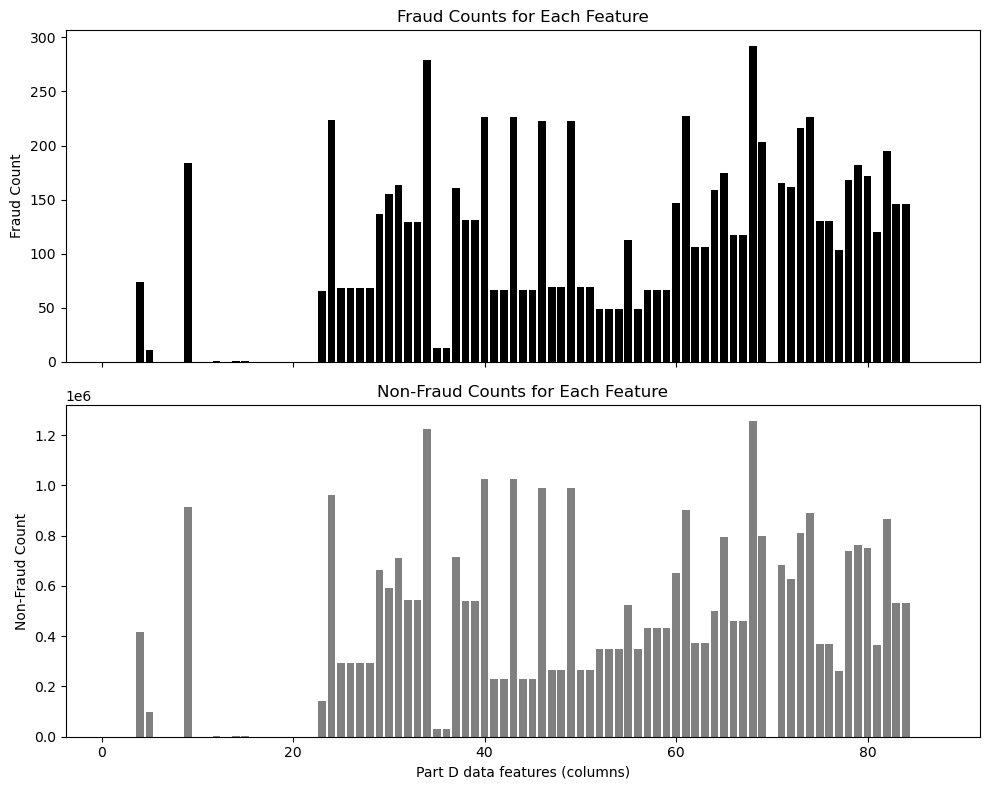

In [31]:
# Create two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plot for Fraud counts
ax1.bar(df['Feature'], df['Fraud'], color='black', label='Fraud')
ax1.set_ylabel('Fraud Count')
ax1.set_title('Fraud Counts for Each Feature')

# Plot for Non-Fraud counts
ax2.bar(df['Feature'], df['Non-Fraud'], color='gray', label='Non-Fraud')
ax2.set_xlabel('Part D data features (columns)')
ax2.set_ylabel('Non-Fraud Count')
ax2.set_title('Non-Fraud Counts for Each Feature')

# Adjust layout to prevent clipping of ylabel
plt.tight_layout()

plt.show()

In [17]:
part_d_features = part_d[["PRSCRBR_NPI","Prscrbr_Type_src","Tot_Benes","Tot_Clms","Tot_30day_Fills","Tot_Day_Suply","Tot_Drug_Cst","Fraud","FraudType"]].dropna(axis=0)

In [18]:
part_d_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1112168 entries, 0 to 1255174
Data columns (total 9 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   PRSCRBR_NPI       1112168 non-null  int64  
 1   Prscrbr_Type_src  1112168 non-null  object 
 2   Tot_Benes         1112168 non-null  float64
 3   Tot_Clms          1112168 non-null  int64  
 4   Tot_30day_Fills   1112168 non-null  float64
 5   Tot_Day_Suply     1112168 non-null  int64  
 6   Tot_Drug_Cst      1112168 non-null  float64
 7   Fraud             1112168 non-null  int64  
 8   FraudType         1112168 non-null  object 
dtypes: float64(3), int64(4), object(2)
memory usage: 84.9+ MB


In [19]:
part_d_features["Fraud"].value_counts()

0    1111941
1        227
Name: Fraud, dtype: int64

In [21]:
part_d_features.to_csv('labelled_data/part_D/partd_features_data.csv')